In [8]:
using JUDI, JLD, PyPlot

First, we load the velocity models again so we can visualize the width and depth of our models.

From the model size above, we can see that the model width and depth are 9.2 km and 3 km.

The velocity model width : 9200.0 m, and depth : 3000.0 m


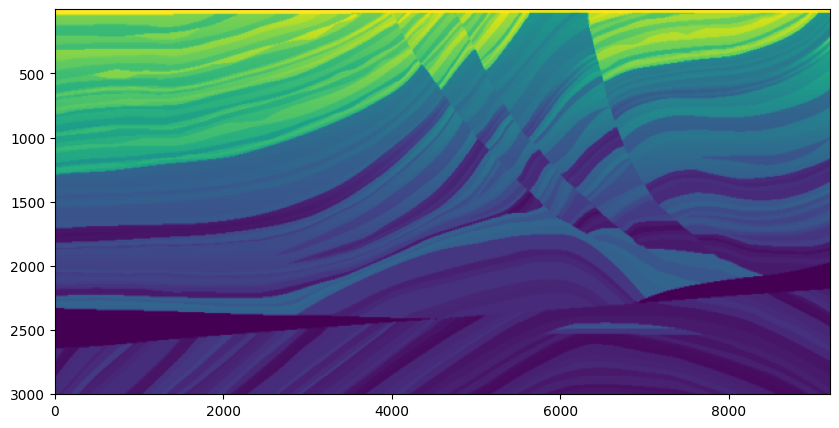

PyObject <matplotlib.image.AxesImage object at 0x7fc3a7561330>

In [9]:
model = load("../data/velocity/model_p_wave_marm.jld", "data")

border = [0, size(model)[1]*spacing(model)[1], size(model)[2]*spacing(model)[1], 1]
println("The velocity model width : $(border[2]) m, and depth : $(border[3]) m")

figure(figsize=(10, 5))
imshow(model.m', aspect="auto", extent=border)

From above model, we can see that our model have size 9.2 km and 3 km. 

Now, we want to make Geometery models. In JUDI Data Structure, we have class or constructur:
```
GeometryIC
    xloc::Array{Array{T, 1},1}
    yloc::Array{Array{T, 1},1}
    zloc::Array{Array{T, 1},1}
    t::Vector{StepRangeLen{T}}
```

These example to set up the geometry:

(1) Set up receiver geometry for 2D experiment with 4 source locations and 80 fixed receivers:
```
xrec = range(100,stop=900,length=80)
yrec = range(0,stop=0,length=80)
zrec = range(50,stop=50,length=80)
dt = 4f0
t = 1000f0

rec_geometry = Geometry(xrec, yrec, zrec; dt=dt, t=t, nsrc=4)
```

(2) Set up corresponding source geometry (coordinates can be of type linspace or regular arrays):
```
xsrc = [200,400,600,800]
ysrc = [0,0,0,0]
zsrc = [50,50,50,50]

src_geometry = Geometry(xsrc, ysrc, zsrc; dt=dt, t=t, nsrc=4)
```

(3) Read source and receiver geometries from SEG-Y file:
```
using SegyIO
seis_block = segy_read("test_file.segy")
rec_geometry = Geometry(seis_block; key="receiver", segy_depth_key="RecGroupElevation")
src_geometry = Geometry(seis_block; key="source", segy_depth_key="SourceDepth")

```

Now let's make our geometry models depend to our velocity models

## 00_Setup geometry : Receiver

In [10]:
nrec = 361
nsrc = 181

xrec = Array{Any}(undef, nsrc)
yrec = Array{Any}(undef, nsrc)
zrec = Array{Any}(undef, nsrc)

for i in 1:nsrc
    xrec[i] = range(100,stop=9100,length=nrec)
    yrec[i] = range(0,stop=0,length=nrec)
    zrec[i] = range(50,stop=50,length=nrec)
end


dt = 2f0
t = 6000f0

rec_geometry = Geometry(xrec, yrec, zrec; dt=dt, t=t)

GeometryIC{Float32} wiht 181 sources


## 01_Setup geometry : Source

In [11]:
xsrc = convertToCell(range(100,stop=9100,length=nsrc))
ysrc = convertToCell(range(0,stop=0,length=nsrc))
zsrc = convertToCell(range(0,stop=0,length=nsrc))

src_geometry = Geometry(xsrc, ysrc, zsrc; dt=dt, t=t)

GeometryIC{Float32} wiht 181 sources


## 02_Ploting and QC geometry acquitition

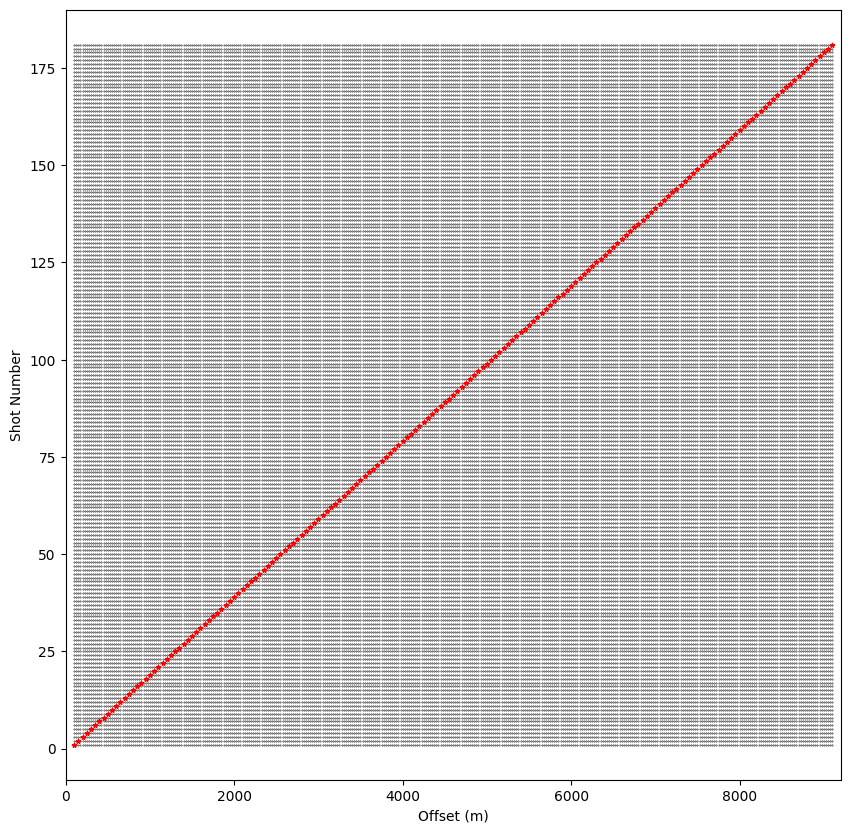

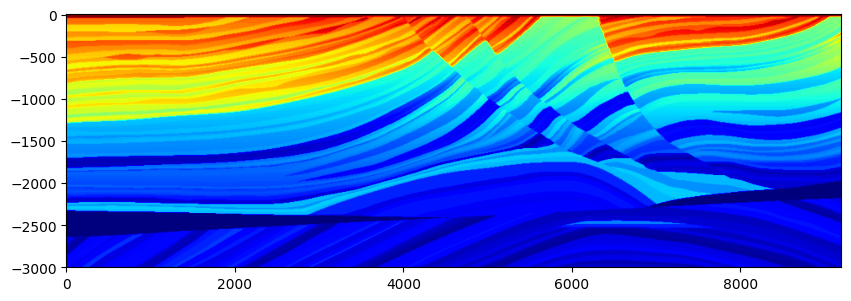

(0.0, 9200.0)

In [24]:
figure(1, figsize=(10, 10))


for i in 1:length(rec_geometry.xloc)
    rec = rec_geometry.zloc[i] * 0 .+ i #for visluize only/SP Number
    src = src_geometry.zloc[i] * 0 .+ i
    scatter(rec_geometry.xloc[i], rec, color="black", s=0.1)
    scatter(src_geometry.xloc[i], src, s=10, marker="*", color="red") #source
end

border = [0, size(model)[1]*spacing(model)[1], -1*size(model)[2]*spacing(model)[1], 1]
xlim(0, border[2])
xlabel("Offset (m)")
ylabel("Shot Number")

figure(2, figsize=(10, 5))
imshow(model.m', aspect="equal", extent=border, cmap="jet")
xlim(0, border[2])

## 03_Source Wavelet

Generated wavelet : 14.999999664723873 Hz


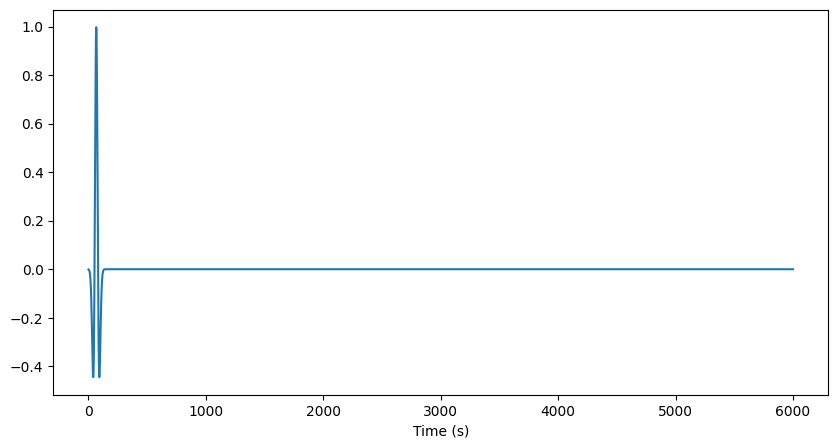

PyObject Text(0.5, 24.0, 'Time (s)')

In [13]:
# setup wavelet
f0 = 0.015f0     # kHz
wavelet = ricker_wavelet(t, dt, f0)

println("Generated wavelet : $(f0*1e3) Hz")

time = range(0f0, stop=t, length=length(wavelet))
figure(figsize=(10, 5))
plot(time, wavelet)
xlabel("Time (s)")

## 04_Save acquitition geometry and source parameters

In [14]:
save("../data/geometry/0_rec_geometry_marm.jld", "data", rec_geometry)
save("../data/geometry/1_src_geometry_marm.jld", "data", src_geometry)
save("../data/geometry/2_wavelet_marm.jld", "data", wavelet)